# Titanic: Machine Learning from Disaster
***
### Start here! Predict survival on the Titanic and get familiar with ML basics

## Titanic Dataset
***
### Load and Explore
[Load Titanic Dataset](#airplane)

[Explore and Visualize](#airplane)


### Introduction to Feature Engineering
[Create New Feature: Title](#airplane)

[Create New Feature: Mother](#airplane)

### Missing Value Treatment
[Data Imputation](#airplane)

## Numeric Feature Engineering Techniques
[Binarization](#airplane)

[Binning](#airplane)

[Quantile Binning](#airplane)
    
### Power Transformations
[Log Transformation](#airplane)

[Box Cox Transformation](#airplane)

### Feature Scaling 
[Min-Max Scaling (Normalization)](#airplane)

[Standardization](#airplane)

## Categorical Feature Engineering Techniques
[Label Encoding](#airplane)

[One Hot Encoding](#airplane)

In [1]:
# manipulating dataframes
import pandas as pd
import numpy as np

# visualizing libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Load Titanic Dataset
***

In [3]:
titanic = pd.read_csv('titanic-data/train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# 891 Rows and 12 Columns
titanic.shape

(891, 12)

## Explore and Visualize Dataset
***

**Examine data types**

In [5]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Examine basic summary statistics**

In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Examine plots to identify any patterns or insights**

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Survived'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

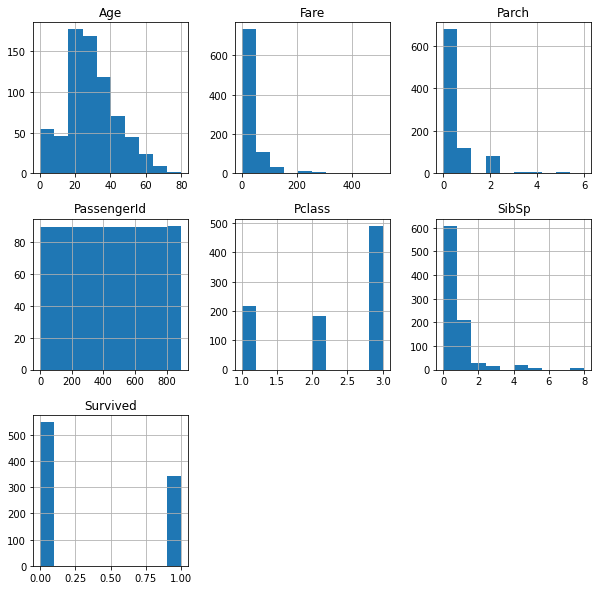

In [48]:
titanic.hist(figsize=(10,10))

## A Taste of Simple Feature Engineering
***
Let's create new features from our dataset:

- **title**: reflecting a persons title (Mr., Mrs. etc)
- **mother**: reflecting if a person is a mother or not

We'll be using the **apply()** function

### New Feature (1): Title

In [7]:
def title(x):
    if 'Mr.' in x:
        return 'Mr'
    elif 'Mrs.' in x:
        return 'Mrs'
    elif 'Master' in x:
        return 'Master'
    elif 'Miss.' in x:
        return 'Miss'
    else:
        return 'Other'

In [8]:
# feature for the title of each person
titanic['Title'] = titanic['Name'].apply(title)

titanic['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

### New Feature (2): Mother

Create a new feature called **"Mother"** if 
- the person is female
- has more than one child
- is over 18
- title is not Miss.

In [9]:
def mother(df):
    if df['Sex'] == 'female' and df['Parch'] > 0 and df['Age'] > 18 and df['Title'] != 'Miss':
        return 'Mother'
    else:
        return 'Not Mother'

In [10]:
# feature mother for each person
titanic['Mother'] = titanic.apply(mother, axis=1)

titanic.Mother.value_counts()

Not Mother    839
Mother         52
Name: Mother, dtype: int64

### Examine New DataFrame (Updated with 2 New Features)

In [11]:
# We added in 2 new features
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mother
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,Not Mother
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,Not Mother
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,Not Mother


# Imputing Missing Values
***

Missing Values in dataset:
- age (~20% missing)
- cabin (~77% missing)
- embarked (0.2% missing)

In [12]:
titanic.isnull().sum() / len(titanic)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
Title          0.000000
Mother         0.000000
dtype: float64

### Data Imputation (1): Age

#### How do we impute age?

How should we impute the missing age of the passengers? Do we use the mean? or the median?

Would the **mean** be a realistic approach to apply to **every** passenger on the Titanic?

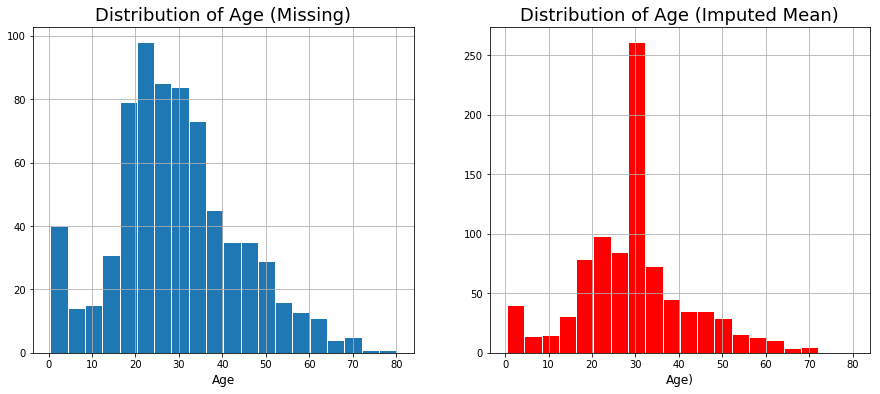

In [13]:
# Plot Distribution of Age (Missing)
plt.subplot(1, 2, 1)
titanic['Age'].hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Missing)', fontsize=18)

# Plot Distribution of Age (Imputed Mean)
plt.subplot(1, 2, 2)
mean_age = pd.DataFrame(titanic['Age'].fillna(titanic.Age.mean()))
mean_age['Age'].hist(bins=20, figsize=(15,6), edgecolor='white', color='r')
plt.xlabel('Age)', fontsize=12)
plt.title('Distribution of Age (Imputed Mean)', fontsize=18)

plt.show()

### Smarter Data Imputation: Age by Passenger Title

In [14]:
titanic.groupby(['Title'])['Age'].median()

Title
Master     3.5
Miss      21.0
Mr        30.0
Mrs       35.0
Other     44.5
Name: Age, dtype: float64

**Missing Age Imputation**: The "Title" of each passenger tells a more realistic story on how we can impute their missing age.

Text(0, 0.5, 'Age')

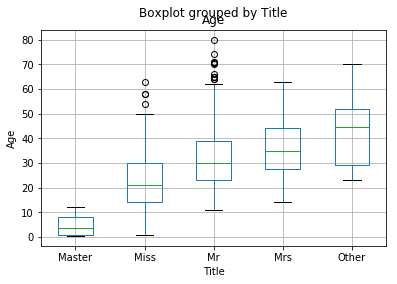

In [15]:
titanic.boxplot(column='Age',by='Title') #Mean Age is different per title
plt.ylabel('Age')

In [16]:
# Fill in the missing age with the median of their Titles
titanic['Age'].fillna(titanic.groupby(["Title"])["Age"].transform(np.median),inplace=True)

**Plot the Age Distribution Again**

Text(0.5, 1.0, 'Distribution of Age (Imputed by Title)')

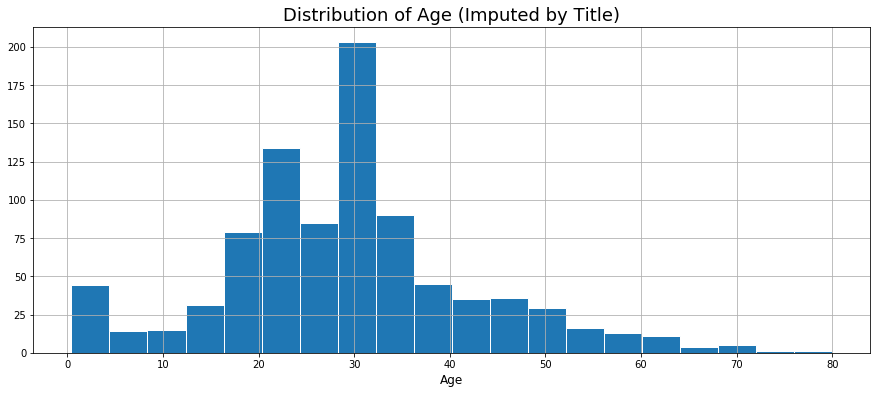

In [17]:
titanic['Age'].hist(bins=20, figsize=(15,6), edgecolor='white')
plt.xlabel('Age', fontsize=12)
plt.title('Distribution of Age (Imputed by Title)', fontsize=18)

### Data Imputation (2): Embarked

We have two missing values for Embarked. Let's impute it with the most occuring embarked station (S)

In [18]:
titanic.Embarked.value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

**Impute missing 'Embarked' variable with the most frequent value: (S)**

In [19]:
# Approach 1:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].value_counts().index[0])

# Approach 2:
# titanic['Embarked'] = titanic['Embarked'].fillna('S')

### Data Imputation (3): Cabin

**77% missing values from Cabin**

In [20]:
titanic.Cabin.isnull().sum() / len(titanic)

0.7710437710437711

**Drop Cabin Feature**

**WARNING:** Before you drop any feature, make sure you:
1. Check if there is a strong indicator between the target and missing feature
2. Check if the feature is relevant to the dataset
3. Check if the feature is not junk

**Always ask yourself:** 
1. Why is the feature missing?
2. How is the feature missing?
3. Is a missing feature an information we can capture?

In [21]:
titanic.drop(columns=['Cabin'], inplace=True)

## Numeric Feature Engineering Techniques

**There are a lot of different types of numerical data, example:**
- counts
- price
- percentages
- measurements

**Numeric Features are about:**
- Scale: the range of values
- Distribution: the probability of taking on a particular value


**Remember:**

In machine learning, all data eventually boils down to numeric features. 

## Interaction Features
***

Interaction features may be generated for free in tree-based models (e.g. based on tree splits of your data)

Linear Models, on the other hand, need explicit creation of these interaction features. 


**There's a lot of single passengers...**

In [22]:
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic.FamilySize.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

**Examine distribution of passenger family size**: Notice how there's A LOT of single riders.

Text(0, 0.5, 'Frequency')

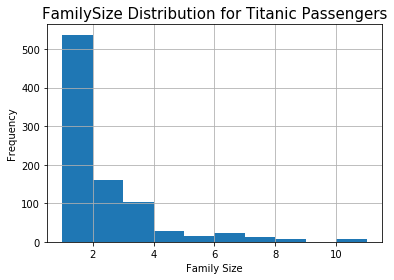

In [23]:
titanic.FamilySize.hist()
plt.title('FamilySize Distribution for Titanic Passengers', size=15)
plt.xlabel("Family Size")
plt.ylabel('Frequency')

## Dealing with Counts
***
### a. Binarization
Raw family size may not be a **robust** measurement. 

With domain knowledge, we can say that passengers are broken up into two family sizes: 
1. Traveling Alone 
2. Traveling with Family

**Create new feature:** "IsAlone"

In [24]:
titanic['IsAlone'] = titanic['FamilySize'].apply(lambda x: 1 if x == 1 else 0)
titanic.IsAlone.value_counts()

1    537
0    354
Name: IsAlone, dtype: int64

Text(0, 0.5, 'Frequency')

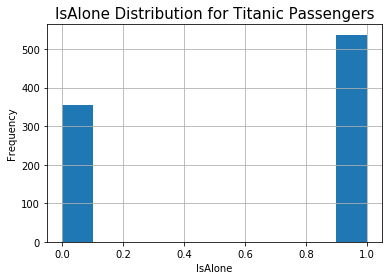

In [25]:
titanic.IsAlone.hist()
plt.title('IsAlone Distribution for Titanic Passengers', size=15)
plt.xlabel("IsAlone")
plt.ylabel('Frequency')

### b. Quantization or Binning
We group the counts into bins, and get rid of the actual count values. Quantization maps a continuous number to a discrete one. 

**Binning helps solve the skewness problem.**

Text(0, 0.5, 'Frequency')

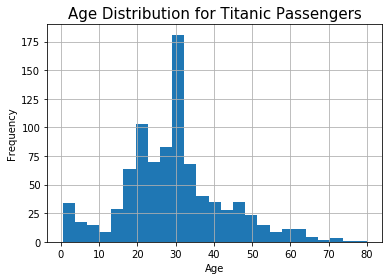

In [26]:
# Examine the Age Distribution
titanic.Age.hist(bins=25)
plt.title('Age Distribution for Titanic Passengers', size=15)
plt.xlabel("Age")
plt.ylabel('Frequency')

**Fixed-width Binning**: With domain knowledge, we can safely bin our passengers into different age groups.

In [27]:
# Fixed Width Binning (Kid, Teen, Adult, Elderly)
bins = [0,12,17,60,150]
labels = ["kid","teen","adult","elderly"]
titanic['AgeGroup'] = pd.cut(titanic.Age,bins=bins,labels=labels)
titanic[['Age','AgeGroup']].head(10)

,Age,AgeGroup
0,22.0,adult
1,38.0,adult
2,26.0,adult
3,35.0,adult
4,35.0,adult
5,30.0,adult
6,54.0,adult
7,2.0,kid
8,27.0,adult
9,14.0,teen


In [28]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Mother,FamilySize,IsAlone,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,Not Mother,2,0,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,Not Mother,2,0,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,Not Mother,1,1,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,Not Mother,2,0,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,Not Mother,1,1,adult


## Power Transformations
***

Transformations are useful tools to apply to **non-normal data**

**Power Transformations DOES CHANGE the distribution of your data and tries to make it more "normal".**


### Example: Log Transformation

The log transformation is a powerful tool for dealing with heavy right-skewed distributions. It compresses the long tail of the distribution into a shorter tail, and expands the lower tail of the distribution into the longer head. 

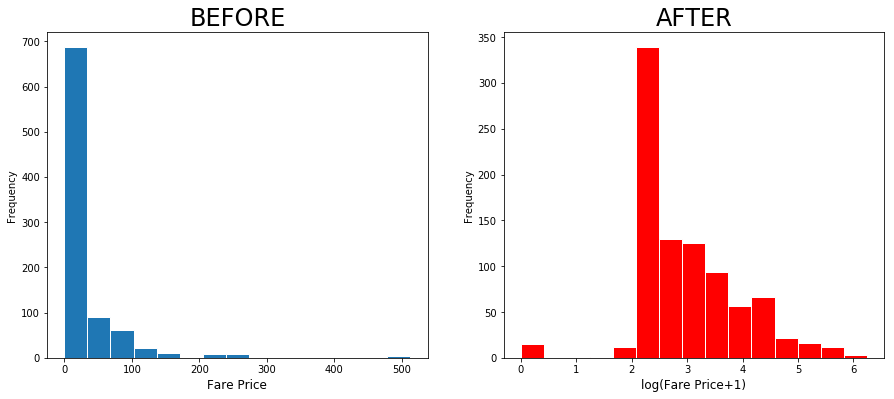

In [29]:
# Plot Fare Price Distribution
plt.subplot(1, 2, 1)
(titanic['Fare']).plot.hist(bins=15, figsize=(15, 6), edgecolor = 'white')
plt.xlabel('Fare Price', fontsize=12)
plt.title('BEFORE', fontsize=24)

#Plot Log Fare Price Distribution
plt.subplot(1, 2, 2)
np.log(titanic['Fare']+1).plot.hist(bins=15,figsize=(15,6), edgecolor='white', color='r')
plt.xlabel('log(Fare Price+1)', fontsize=12)
plt.title('AFTER', fontsize=24)

plt.show()

## Feature Scaling or Normalization
***

Feature scaling always divides the feature by a constant.

And it does not change the distribution of your data

**Let's see feature scaling in action on 'Fare Price'**''

In [30]:
import sklearn.preprocessing as preproc
df_scale = titanic[['Fare']]

### Min-Max Scaling

In [31]:
df_scale['Min-Max'] = preproc.minmax_scale(titanic[['Fare']])

### Standardization (Variance Scaling)

In [32]:
df_scale['Standardization'] = preproc.StandardScaler().fit_transform(titanic[['Fare']])

### Plotting Scaled Features

Text(0.5, 15.0, 'Standarized Price')

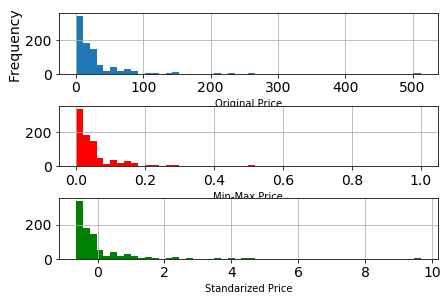

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1)
fig.tight_layout()

# Plot Original Price
df_scale['Fare'].hist(ax=ax1, bins=50)
ax1.tick_params(labelsize=14)
ax1.set_xlabel("Original Price", fontsize=10)
ax1.set_ylabel("Frequency", fontsize=14)

# Plot Min-Max Scaling on Price
df_scale['Min-Max'].hist(ax=ax2, bins=50, color='r')
ax2.tick_params(labelsize=14)
ax2.set_xlabel("Min-Max Price", fontsize=10)

# Plot Standardized Scaling on Price
df_scale['Standardization'].hist(ax=ax3, bins=50, color='g')
ax3.tick_params(labelsize=14)
ax3.set_xlabel("Standarized Price", fontsize=10)

## Categorical Feature Engineering Techniques
***

### Dummy Encoding
****

Use one Dummy encoding where you want each value/category of the feature to be **unique**. 

One Hot Encoding fixes the problem of having your model think that different categorical values have some numeric association to it. 

**Apply Dummy Encoding to 'AgeGroup' feature**

In [34]:
titanic_dummyage = pd.get_dummies(titanic[['Mother','AgeGroup','Sex', 'Title', 'Embarked']])
titanic_dataframe = pd.concat([titanic, titanic_dummyage], axis=1)

In [35]:
titanic_dataframe.iloc[:10,10:20]

,Embarked,Title,Mother,FamilySize,IsAlone,AgeGroup,Mother_Mother,Mother_Not Mother,AgeGroup_kid,AgeGroup_teen
0,S,Mr,Not Mother,2,0,adult,0,1,0,0
1,C,Mrs,Not Mother,2,0,adult,0,1,0,0
2,S,Miss,Not Mother,1,1,adult,0,1,0,0
3,S,Mrs,Not Mother,2,0,adult,0,1,0,0
4,S,Mr,Not Mother,1,1,adult,0,1,0,0
5,Q,Mr,Not Mother,1,1,adult,0,1,0,0
6,S,Mr,Not Mother,1,1,adult,0,1,0,0
7,S,Master,Not Mother,5,0,kid,0,1,1,0
8,S,Mrs,Mother,3,0,adult,1,0,0,0
9,C,Mrs,Not Mother,2,0,teen,0,1,0,1


In [36]:
titanic_dataframe.shape

(891, 32)

In [37]:
titanic_dataframe.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Title', 'Mother', 'FamilySize',
       'IsAlone', 'AgeGroup', 'Mother_Mother', 'Mother_Not Mother',
       'AgeGroup_kid', 'AgeGroup_teen', 'AgeGroup_adult', 'AgeGroup_elderly',
       'Sex_female', 'Sex_male', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [38]:
titanic_dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,1,0,0,1,0,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,0,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,1,0,0,1,0,0,0,0,1


In [39]:
X = titanic_dataframe[['PassengerId','Pclass', 'SibSp',
       'Parch','Fare','FamilySize',
       'IsAlone', 'Mother_Mother', 'Mother_Not Mother',
       'AgeGroup_kid', 'AgeGroup_teen', 'AgeGroup_adult', 'AgeGroup_elderly',
       'Sex_female', 'Sex_male','Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Other']]
y = titanic_dataframe['Survived']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logistic_regression = LogisticRegression(class_weight='balanced')
logistic_regression = logistic_regression.fit(X_train, y_train)

In [43]:
# Make class label predictions
y_pred = logistic_regression.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [45]:
accuracy = accuracy_score(y_pred, y_test)
print(accuracy)

0.8171641791044776


In [46]:
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       168
           1       0.73      0.80      0.77       100

   micro avg       0.82      0.82      0.82       268
   macro avg       0.80      0.81      0.81       268
weighted avg       0.82      0.82      0.82       268



In [47]:
print(confusion_matrix(y_pred, y_test))

[[139  29]
 [ 20  80]]


In [48]:
titanic_dataframe.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [49]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion='entropy')
decision_tree = decision_tree.fit(X_train, y_train)

In [50]:
y_pred_dt = decision_tree.predict(X_test)
print(accuracy_score(y_pred_dt, y_test))

0.7574626865671642


In [60]:
from sklearn.svm import SVC
svm_svc = SVC(gamma='auto')
svm_svc = svm_svc.fit(X_train, y_train,sample_weight=None)
y_pred_svc = svm_svc.predict(X_test)
print(accuracy_score(y_pred_svc, y_test))

0.5895522388059702


In [ ]:
from sklearn.svm import SVC
svm_svc = SVC(kernel='poly', gamma='auto')
svm_svc = svm_svc.fit(X_train, y_train,sample_weight=None)
y_pred_svc = svm_svc.predict(X_test)
print(accuracy_score(y_pred_svc, y_test))

## Questions
***
1. What are some common approaches to encode categorical features? What are the drawbacks of each?
2. Why would you use transformation techniques on your data? Can it improve model performance?
3. What are some appropriate ways to impute missing values? Is it safe to just drop a column because it has missing values?
4. What are some common approaches to encode numerical features? 

## Activity
***
Feature Engineering can definitely impact your model's performance and increase your score. 

**Try it out yourself:**

1. Download the Titanic Dataset: https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster
2. Without feature engineering or any data pre-processing, apply a Logistic Regression model to predict whether or not the passenger survived. 
3. Examine your model's performance.

**Now try it with Feature Engineering and Data PreProcessing from the examples above:**
1. Apply appropriate pre-processing techniques we covered above
2. Create a new feature called 'Title' and include that as a new feature in your dataset
3. Apply a Logistic Regression model again 
4. Examine your model's performance

**Compare your results and see if there are any significant improvements!**